# Getting ready

In [1]:
from matplotlib import pyplot as plt
from helpers.path_utils import get_base_dir
from helpers.transform import TrimAfterTrigger
from helpers.plot import plot_wavelet_spectrogram

AUDIO_NAME = "test-202407211616"
DIGITAL_DIR = get_base_dir().joinpath(f"data/digital/{AUDIO_NAME}.wav")
MOBILE_DIR = get_base_dir().joinpath(f"data/mobile/{AUDIO_NAME}.m4a")

tat = TrimAfterTrigger()
tat

# Original

Mobile - shape: torch.Size([1, 693248]), sample rate: 16000
Digital - shape: torch.Size([1, 60000]), sample rate: 4000


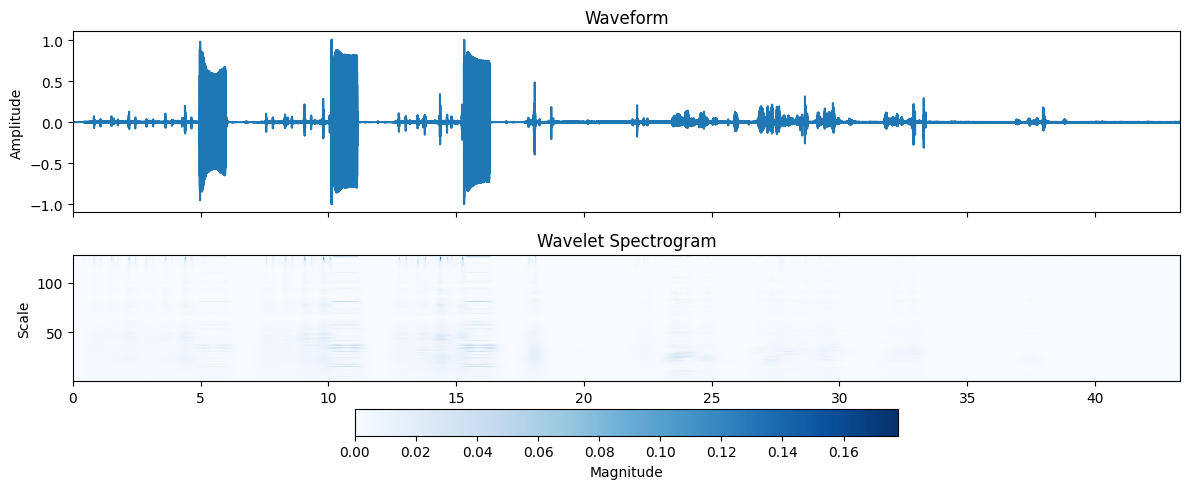

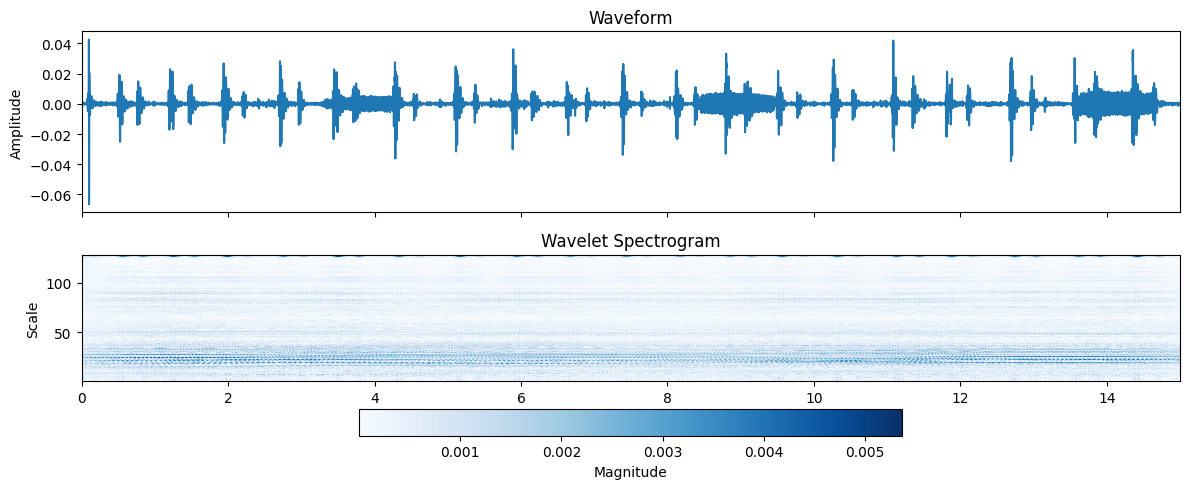

In [2]:
mobile, mobile_sample_rate = tat.load_audio(MOBILE_DIR)
digital, digital_sample_rate = tat.load_audio(DIGITAL_DIR)

print(f"Mobile - shape: {mobile.shape}, sample rate: {mobile_sample_rate}")
print(f"Digital - shape: {digital.shape}, sample rate: {digital_sample_rate}")

plot_wavelet_spectrogram(mobile.squeeze(), mobile_sample_rate)
plot_wavelet_spectrogram(digital.squeeze(), digital_sample_rate)

# Trim to segments

## Digital trim

#1 (4.1s): tensor([0.4791, 0.4808, 0.4826,  ..., 0.4935, 0.4616, 0.4303])


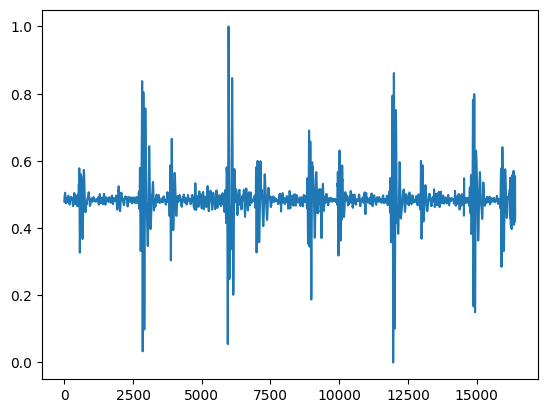

#2 (4.2s): tensor([0.5268, 0.5367, 0.5444,  ..., 0.5015, 0.4652, 0.4273])


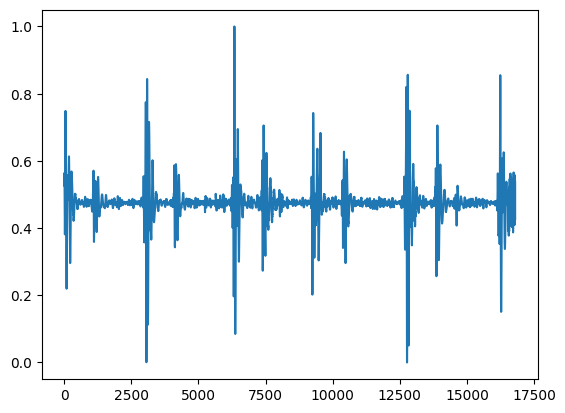

In [3]:
SYNTHETIC_FREQ = 300
MIN_SECS = 4

DIGITAL_DOWNSAMPLE_FACTOR = 400
DIGITAL_SIGMA_SMOOTH = 2
DIGITAL_PEAKS_HEIGHT = 0.3
DIGITAL_PEAKS_PROMINENCE = 0.0001

digital_segments = tat.transform(
    audio_dir=DIGITAL_DIR,
    synthetic_freq=SYNTHETIC_FREQ,
    downsample_factor=DIGITAL_DOWNSAMPLE_FACTOR,
    sigma_smooth=DIGITAL_SIGMA_SMOOTH,
    peaks_height=DIGITAL_PEAKS_HEIGHT,
    peaks_prominence=DIGITAL_PEAKS_PROMINENCE,
    segment_min_duration=MIN_SECS,
)

for i, segment in enumerate(digital_segments[0]):
    segment = segment.squeeze()
    duration = len(segment) / digital_sample_rate

    print(f"#{i+1} ({duration}s): {segment}")
    plt.plot(segment)
    plt.show()

## Digital stethoscope trim

#1 (5.025s): tensor([0.4929, 0.4929, 0.4929,  ..., 0.8588, 0.8509, 0.8015])


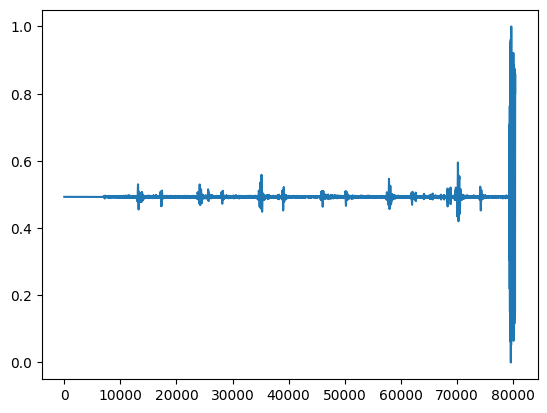

#2 (4.2s): tensor([0.5125, 0.5145, 0.5141,  ..., 0.6803, 0.7474, 0.8013])


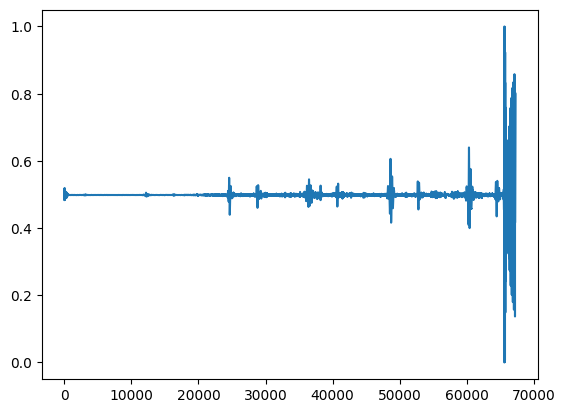

#3 (4.225s): tensor([0.4984, 0.4983, 0.4983,  ..., 0.3041, 0.2541, 0.2059])


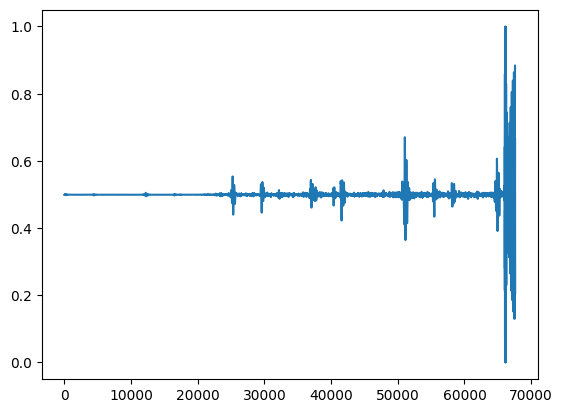

#4 (26.978s): tensor([0.4496, 0.4495, 0.4495,  ..., 0.4521, 0.4524, 0.4527])


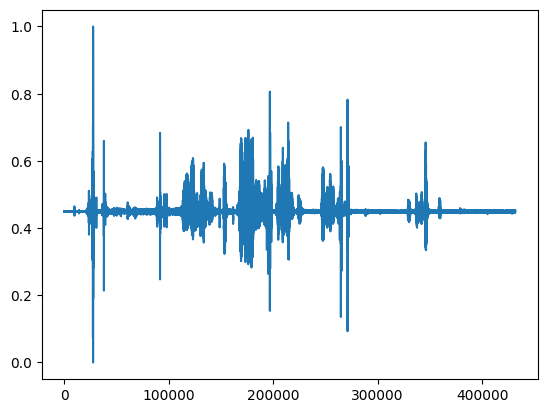

In [4]:
SYNTHETIC_FREQ = 300
MIN_SECS = 4

MOBILE_DOWNSAMPLE_FACTOR = 400
MOBILE_SIGMA_SMOOTH = 2
MOBILE_PEAKS_HEIGHT = 0.3
MOBILE_PEAKS_PROMINENCE = 0.0001

mobile_segments = tat.transform(
    audio_dir=MOBILE_DIR,
    synthetic_freq=SYNTHETIC_FREQ,
    downsample_factor=MOBILE_DOWNSAMPLE_FACTOR,
    sigma_smooth=MOBILE_SIGMA_SMOOTH,
    peaks_height=MOBILE_PEAKS_HEIGHT,
    peaks_prominence=MOBILE_PEAKS_PROMINENCE,
    segment_min_duration=MIN_SECS,
)

for i, segment in enumerate(mobile_segments[0]):
    segment = segment.squeeze()
    duration = len(segment) / mobile_sample_rate

    print(f"#{i+1} ({duration}s): {segment}")
    plt.plot(segment)
    plt.show()

In [ ]:
mobile, mobile_sample_rate = tac.transform(MOBILE_DIR)
digital, digital_sample_rate = tac.transform(DIGITAL_DIR)

print(mobile.shape, digital.shape)

plot_wavelet_spectrogram(mobile, mobile_sample_rate)
plot_wavelet_spectrogram(digital, digital_sample_rate)

# Align both to the same duration

In [ ]:
mobile, mobile_sample_rate, digital, digital_sample_rate = tac.align_audios(
    MOBILE_DIR, DIGITAL_DIR
)

print(mobile.shape, digital.shape)

plot_wavelet_spectrogram(mobile, mobile_sample_rate)
plot_wavelet_spectrogram(digital, digital_sample_rate)